# Assignment 3

## Simple and Multiple Linear Regression pt2

Author: Samuel Fredric Berg

Student ID: sb224sc

Date: 2026-01-25

Course: Machine Learning 4DT905

## Conceptual

$$Y = \hat{\beta_0} + \hat{\beta_1}X_1 + \hat{\beta_2}X_2 + \hat{\beta_3}X_3 + \hat{\beta_4}X_1X_2 + \hat{\beta_5}X_1X_3$$

$$
\hat{\beta_0} = 50 (Intercept) \\
\hat{\beta_1} = 20 (GPA) \\
\hat{\beta_2} = 0.07 (IQ) \\
\hat{\beta_3} = 35 (Level) \\
\hat{\beta_4} = 0.01 (GPA \cdot IQ) \\
\hat{\beta_5} = -10 (GPA \cdot Level) \\
X_3 = 1 \text{ for College, } 0 \text{ for High School}
$$

1.

$$
Y_c = 50 + 20X_1 + 0.07X_2 + 35 + 0.01X_1X_2 - 10X_1 \\
Y_h = 50 + 20X_1 + 0.07X_2 + 0.01X_1X_2 \\
Y_c - Y_h = 35 - 10X_1 \\
35 - 10X_1 = 0 \implies X_1 = 3.5 \\
$$

Thue, when GPA > 3.5 High School graduates earn more than College graduates.

Answer: $\boxed{iii}$

2.

$$
X_1 = 4.0 \\
X_2 = 110 \\
X_3 = 1 \\
Y = 50 + 20(4.0) + 0.07(110) + 35 + 0.01(4.0)(110) - 10(4.0) \\
Y = 137.1
$$

Answer: $\boxed{\$137,100}$

3. False. The magnitude of a coefficient does not indicate statistical importance. To determine statistical importance we need to look at the p-values associated with that coefficient, not just its absolute value. In the presented case, the units of predictor $X_2$ (IQ) are generally $\gt 100$. A small coeffeicient for the $X_2 \cdot X_1$ term might still result in a large contribution to the model and be highly statistically significant.

Answer: $\boxed{False}$

## Practical

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

### Assignment 2

### Load data

In [2]:
df = pd.read_csv("../data/Boston.csv", index_col=0)

### Number of predictors and names

In [3]:
df_names = df.columns.tolist()
print(f"Number of columns: {len(df_names)}")
print(f"Column names: {df_names}")

Number of columns: 14
Column names: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


### Statistical summary of predictors

In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Number of datapoints

In [5]:
print(f"Number of datapoints: {len(df)}")

Number of datapoints: 506


### Display data in table format

In [6]:
print(df.head(5))

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  


### Plot lstat, rm and age against medv

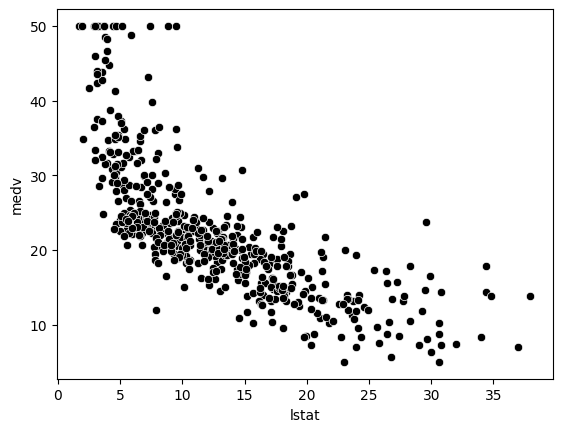

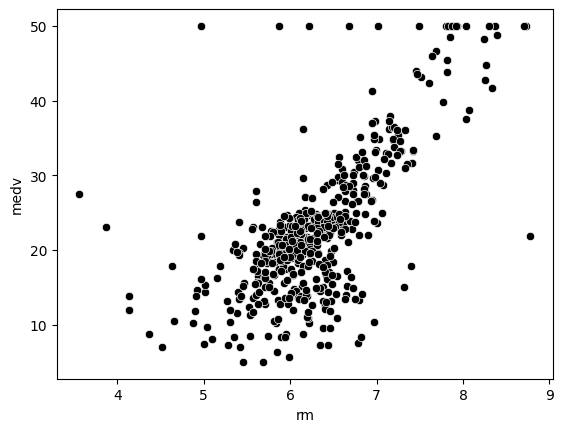

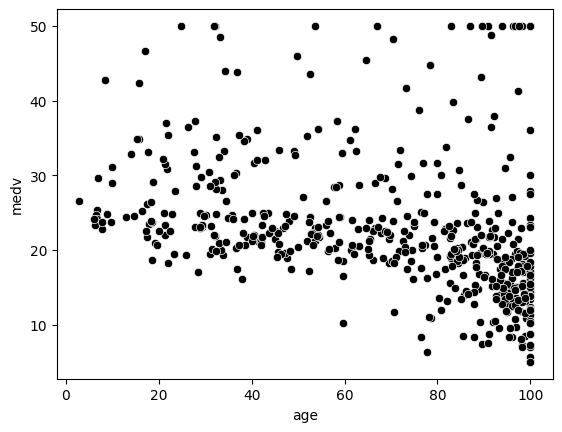

In [7]:
sns.scatterplot(x="lstat", y="medv", data=df, color="black")
plt.show()

sns.scatterplot(x="rm", y="medv", data=df, color="black")
plt.show()

sns.scatterplot(x="age", y="medv", data=df, color="black")
plt.show()

### Linear regression

In [8]:
regression1 = sm.OLS(df["medv"], sm.add_constant(df["lstat"])).fit()
print(regression1.summary())

regression2 = sm.OLS(df["medv"], sm.add_constant(df["rm"])).fit()
print(regression2.summary())

regression3 = sm.OLS(df["medv"], sm.add_constant(df["age"])).fit()
print(regression3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           5.08e-88
Time:                        16:43:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

### Interpretation of regressions
##### lstat
For `lstat` gives R-squared value of (0.544), which means that approximately 54.4% of the variance can be explained the model. The prod F-statistic (5.08e-88) indicates that the model is statistically significant due to the value < 0.05.
The negative coefficient (-0.9500) indicates that as `lstat` increases, `medv` tends to decrease, suggesting an inverse relationship between these two variables.

##### rm
The same interpretation can be made for `rm`, which has an R-squared value of (0.484),prod F-statistic value of (2.49e-74) and a coefficient of (9.1021). Here the positive coefficient indicates that as `rm` increases, `medv` also tends to increase, suggesting a direct relationship between these two variables.

##### age
Same interpretation can be made for `age`, which has an R-squared value of (0.142), prod F-statistic value of (1.57e-18) and a coefficient of (-0.1232). Here the negative coefficient indicates that as `age` increases, `medv` tends to decrease, suggesting an inverse relationship between these two variables.

In [9]:
print(regression1.conf_int())
print(regression2.conf_int())
print(regression3.conf_int())

               0          1
const  33.448457  35.659225
lstat  -1.026148  -0.873951
               0          1
const -39.876641 -29.464601
rm      8.278855   9.925363
               0          1
const  29.015752  32.941604
age    -0.149647  -0.096679


Inicates the lower and upper bounds of the 95% confidence interval. First row (y intercept) and second row (slope of predictor). Smaller intervals in the slope indicates that the model is more precise. 

The second one indicates highly positive correlation but it has a greater interval. Meanwhile the first and third one indicates negative correlation with smaller intervals.

### Use model

In [10]:
use_lstat = pd.DataFrame({"lstat": [5, 10, 15]})
use_lstat = sm.add_constant(use_lstat)
predictor1 = regression1.get_prediction(use_lstat).summary_frame(alpha=0.05)
print(predictor1[["mean", "obs_ci_lower", "obs_ci_upper"]])

use_rm = pd.DataFrame({"rm": [5, 6.5, 8]})
use_rm = sm.add_constant(use_rm)
perdictor2 = regression2.get_prediction(use_rm).summary_frame(alpha=0.05)
print(perdictor2[["mean", "obs_ci_lower", "obs_ci_upper"]])

use_age = pd.DataFrame({"age": [25, 50, 75]})
use_age = sm.add_constant(use_age)
perdictor3 = regression3.get_prediction(use_age).summary_frame(alpha=0.05)
print(perdictor3[["mean", "obs_ci_lower", "obs_ci_upper"]])

        mean  obs_ci_lower  obs_ci_upper
0  29.803594     17.565675     42.041513
1  25.053347     12.827626     37.279068
2  20.303101      8.077742     32.528459
        mean  obs_ci_lower  obs_ci_upper
0  10.839924     -2.214474     23.894322
1  24.493088     11.480391     37.505784
2  38.146251     25.058353     51.234149
        mean  obs_ci_lower  obs_ci_upper
0  27.899610     11.090368     44.708852
1  24.820542      8.043748     41.597335
2  21.741474      4.971031     38.511917


#### Interpretation of results
##### lstat
Inserted values for `lstat` where 5, 10, 15 this means that with 95% confidence the predicted `medv` values will respectivly be between (17.56, 42.04), (12.82, 37.27) and (8.07, 32.52) approximatly.

##### rm & age
Same interpretation can be made for `rm` and `age` where inserted values are 5, 6.5, 8 for `rm` and 25, 50, 75 for `age`.

In [11]:
regression = sm.OLS(df["medv"], sm.add_constant(df[["lstat", "rm", "age"]])).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          1.20e-110
Time:                        16:43:09   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1753      3.182     -0.369      0.7

Here the R-squared value (0.639) indicates that approximately 63.9% of the variance in `medv` can be explained by the model. The prod F-statistic (1.20e-110) indicates that the model is statistically significant due to the value < 0.05.

In [12]:
regression = sm.OLS(df["medv"], sm.add_constant(df.drop(columns=["medv"]))).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          6.72e-135
Time:                        16:43:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

Here the R-squeared value (0.741) indicates that approximately 74.1% of the variance in `medv` can be explained by the model. The prod F-statistic (6.72e-135) indicates that the model is statistically significant due to the value < 0.05.

#### Correlation matrix

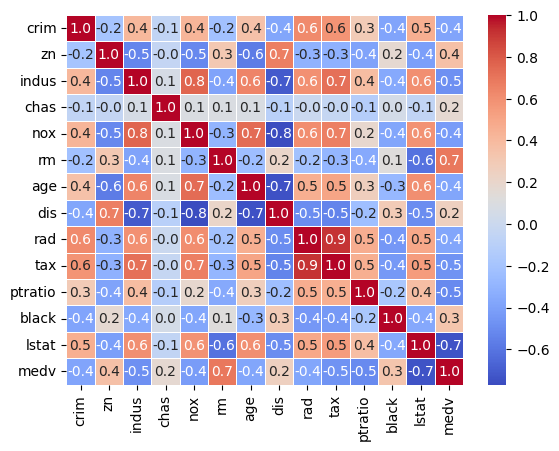

In [13]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.show()

This matrix shows the correlation coefficients between each pair of variables in the dataset. A correlation coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation. A coefficient around 0 suggests no correlation between the variables.

Example interpretations:

`crim` and `zn` have a correlation coefficient of -0.2, indicating a weak negative correlation. This suggests that as the value of `crim` increases, the value of `zn` tends to decrease slightly.

### Use multiple linear regression model

In [14]:
selected_predictor_values = pd.DataFrame(
    pd.MultiIndex.from_product(
        [[5, 10, 15], [5, 6.5, 8]], names=["lstat", "rm"]
    ).to_frame(index=False)
)
print(selected_predictor_values)

regression = sm.OLS(df["medv"], sm.add_constant(df[["lstat", "rm"]])).fit()
selected_predictor_values = sm.add_constant(selected_predictor_values)
predictions = regression.get_prediction(selected_predictor_values)
pred_summary = predictions.summary_frame(alpha=0.05)

print(pred_summary[["mean", "obs_ci_lower", "obs_ci_upper"]])

   lstat   rm
0      5  5.0
1      5  6.5
2      5  8.0
3     10  5.0
4     10  6.5
5     10  8.0
6     15  5.0
7     15  6.5
8     15  8.0
        mean  obs_ci_lower  obs_ci_upper
0  20.903875      9.889729     31.918021
1  28.546057     17.635923     39.456192
2  36.188239     25.225479     47.150999
3  17.692084      6.722152     28.662016
4  25.334266     14.437027     36.231505
5  32.976448     21.995024     43.957872
6  14.480292      3.537875     25.422709
7  22.122474     11.221204     33.023745
8  29.764656     18.747835     40.781477


#### Interpretation of results
Row one indicates that for value of `lstat` (5) and `rm` (5.0) will with 95% confidence result in a `medv` value between (9.88, 31.91), meanwhile row nine indicates that for value of `lstat` (15) and `rm` (8.0) will with 95% confidence result in a `medv` value between (18.74, 40.78). Same goes for all the subsequent rows with different values for `lstat` and `rm` which also provides a new boundary for all combinations of them. 

### Assignment 3

In [15]:
X = df[["lstat", "rm", "nox", "dis", "ptratio"]]
Y = df["medv"]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          3.67e-131
Time:                        16:43:09   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4992      4.613      8.129      0.0

In [16]:
df["lstat_rm"] = df["lstat"] * df["rm"]
X = df[["lstat", "rm", "lstat_rm", "nox", "dis", "ptratio"]]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     290.8
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          2.48e-159
Time:                        16:43:09   Log-Likelihood:                -1459.9
No. Observations:                 506   AIC:                             2934.
Df Residuals:                     499   BIC:                             2963.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1518      4.880      0.646      0.5

#### Interpretation of results
By utilizing `lstat`, `rm`, `nox`, `dis` and `ptratio` columns, the model achives an R-squared value of (0.705), but by just adding the interaction between `lstat` and `rm` the R-squared value increases to (0.775). This indicates that the interaction between `lstat` and `rm` contributes a better prediction of `medv` then just using the individual predictors alone.

#### Adding non-linear term

In [17]:
df["lstat_rm_squared"] = df["lstat_rm"] ** 2
X = df[["lstat", "rm", "lstat_rm", "lstat_rm_squared", "nox", "dis", "ptratio"]]
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     253.9
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          8.05e-160
Time:                        16:43:09   Log-Likelihood:                -1455.8
No. Observations:                 506   AIC:                             2928.
Df Residuals:                     498   BIC:                             2961.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.5522      5.499  

#### Preform ANOVA

In [18]:
ANOVA_results = sm.stats.anova_lm(model2, model3)
print(ANOVA_results)

   df_resid          ssr  df_diff     ss_diff         F    Pr(>F)
0     499.0  9500.381881      0.0         NaN       NaN       NaN
1     498.0  9348.435955      1.0  151.945925  8.094303  0.004623


#### Conclusion from ANOVA
ANOVA test indicates that the third model (with interaction and non-linear term) is significantly better then the second model (with interaction) due to the p-value being less than 0.05 (0.004) and it having a better R-squared value.

#### Add polynomial

In [19]:
for exp in range(2, 6):
    df[f"lstat_poly_{exp}"] = df["lstat"] ** exp

X = df[
    [
        "lstat",
        "rm",
        "lstat_rm",
        "lstat_poly_2",
        "lstat_poly_3",
        "lstat_poly_4",
        "lstat_poly_5",
        "nox",
        "dis",
        "ptratio",
    ]
]
X = sm.add_constant(X)
model4 = sm.OLS(Y, X).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     188.0
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          1.80e-161
Time:                        16:43:09   Log-Likelihood:                -1443.5
No. Observations:                 506   AIC:                             2909.
Df Residuals:                     495   BIC:                             2956.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           33.9246      7.663      4.427   

In [20]:
ANOVA_results = sm.stats.anova_lm(model2, model4)
print(ANOVA_results)

   df_resid          ssr  df_diff     ss_diff         F    Pr(>F)
0     499.0  9500.381881      0.0         NaN       NaN       NaN
1     495.0  8903.772453      4.0  596.609428  8.292038  0.000002


#### Conclusion from ANOVA
The p-value decreased significantly (0.000002) indicating that the fourth model (with interaction and polynomial term) is statistically significantly better then the third model (with interaction and non-linear term), however with high degree polynomials there is a risk of overfitting the model to the training data, which can lead to poor generalization to new data.

In [21]:
df["log_rm"] = np.log(df["rm"])

X = df[
    [
        "lstat",
        "lstat_poly_2",
        "lstat_poly_3",
        "lstat_poly_4",
        "lstat_poly_5",
        "rm",
        "log_rm",
        "nox",
        "dis",
        "ptratio",
    ]
]
X = sm.add_constant(X)
model5 = sm.OLS(Y, X).fit()

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          7.10e-168
Time:                        16:43:09   Log-Likelihood:                -1428.4
No. Observations:                 506   AIC:                             2879.
Df Residuals:                     495   BIC:                             2925.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          172.9866     13.954     12.397   

In [22]:
ANOVA_results = sm.stats.anova_lm(model2, model5)
print(ANOVA_results)

   df_resid          ssr  df_diff     ss_diff          F        Pr(>F)
0     499.0  9500.381881      0.0         NaN        NaN           NaN
1     495.0  8386.756361      4.0  1113.62552  16.431997  1.190966e-12


#### Conclusion from ANOVA
Increase in R-squared value and the very low p-value indicates that the fifth model (with interaction, higher degree polynomial term and logarithmic term) is statistically significantly better then the fourth model (with interaction and polynomial term).

#### Load data 2

In [23]:
df2 = pd.read_csv("../data/Carseats.csv", index_col=0)
print(df2.describe(), "\n")
print(df2["ShelveLoc"].value_counts(), "\n")
print(df2["Urban"].value_counts(), "\n")
print(df2["US"].value_counts())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

In [24]:
X = pd.get_dummies(df2, columns=["ShelveLoc", "Urban", "US"])
for column in X.select_dtypes("bool"):
    X[column] = X[column].astype(int)

X = X.drop(columns=["Sales"])
X = sm.add_constant(X)
Y = df2["Sales"]
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          1.60e-166
Time:                        16:43:09   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.3853      0.253  

#### Conclusion from model summary
The model achieves an R-squared value (0.873) which indicates that $\approx$ 87.3% of the variance can be explained by the model. The prob F-statistic (1.60e-166) indicates that the model is statistically significant due to the value < 0.05.

In [25]:
X = df2.drop(columns=["Sales", "Population", "Education", "Age", "Urban", "US"])
X = pd.get_dummies(X, columns=["ShelveLoc"])

for column in X.select_dtypes("bool"):
    X[column] = X[column].astype(int)

X["Income:Advertising"] = df2["Income"] * df2["Advertising"]
X["Price:Age"] = df2["Price"] * df2["Age"]
Y = df2["Sales"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     328.2
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          2.90e-168
Time:                        16:43:09   Log-Likelihood:                -573.74
No. Observations:                 400   AIC:                             1165.
Df Residuals:                     391   BIC:                             1201.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1957      0

#### Conclusion form model summary
Achives an R-squared value (0.870) which is worse than the previous model and prob F-statistic (2.90e-168) which indicates that the model is more statistically significant due to the value < 0.05.

#### Beat the teacher

In [26]:
X = df2.drop(columns=["Sales"])
X = pd.get_dummies(X, columns=["ShelveLoc", "US", "Urban"])

for column in X.select_dtypes("bool"):
    X[column] = X[column].astype(int)

X["Income:Advertising"] = df2["Income"] * df2["Advertising"]
Y = df2["Sales"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     227.6
Date:                Sun, 25 Jan 2026   Prob (F-statistic):          5.48e-167
Time:                        16:43:09   Log-Likelihood:                -565.00
No. Observations:                 400   AIC:                             1156.
Df Residuals:                     387   BIC:                             1208.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5106      0

#### Conclusion from Beat the teacher model
I was able to to get slightly better R-squared value (0.876) with a prob F-statistic (5.48e-167) which is in between the two previous models significance. I did this by not dropping any predictors and adding interaction term between `Income` and `Advertising`.